In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
dns_exf_feats = pd.read_csv("training_dataset.csv")
dns_exf_feats.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1


In [3]:
dns_exf_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Label             536138 non-null  int64  
dtypes: float64(2), int64

In [4]:
from sklearn.preprocessing import LabelEncoder

dns_exf_feats.drop(columns=['timestamp'], inplace=True)
dns_exf_feats.dropna(inplace=True)

dns_exf_feats.longest_word = dns_exf_feats.longest_word.apply(lambda x: len(x))

le = LabelEncoder()
le.fit(dns_exf_feats.sld)
dns_exf_feats.sld = le.transform(dns_exf_feats.sld)

dns_exf_feats.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,24,7,0,10,8,2.054029,6,6,7,3.166667,1,178,11,1,1
1,24,7,0,10,8,2.054029,6,6,7,3.166667,1,178,11,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,1,110,13,1,1
3,26,9,0,10,10,2.742338,6,6,7,3.500000,1,110,13,1,1
4,27,10,0,10,11,2.767195,6,6,7,3.666667,1,110,14,1,1


In [5]:
from sklearn.model_selection import train_test_split

X, y = dns_exf_feats.iloc[:, 0:14], dns_exf_feats.iloc[:, 14]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
labels = dns_exf_feats.Label.value_counts().index
frequencies = dns_exf_feats.Label.value_counts()

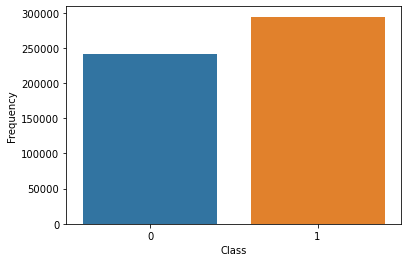

In [62]:
ax = sns.barplot(x=labels, y=frequencies)
ax.set(xlabel='Class', ylabel='Frequency')
plt.show()

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [68]:
n_estimators = [50, 100, 300, 500]
rf_accuracies = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, class_weight='balanced', random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(test_accuracy)

Optimum Accuracy:  0.8209129683283801
Optimum Number of estimators:  50


Text(0, 0.5, 'Accuracy')

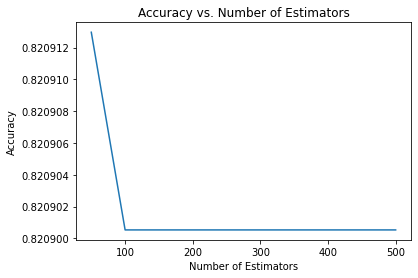

In [69]:
print("Optimum Accuracy: ", np.array(rf_accuracies)[np.argmax(rf_accuracies)])
print("Optimum Number of estimators: ", np.array(n_estimators)[np.argmax(rf_accuracies)])
plt.plot(n_estimators, rf_accuracies)
plt.title("Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

In [70]:
n_estimators = [50, 100, 300, 500]
rf_accuracies = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, criterion="entropy", class_weight='balanced', random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(test_accuracy)

Optimum Accuracy:  0.8209129683283801
Optimum Number of estimators:  100


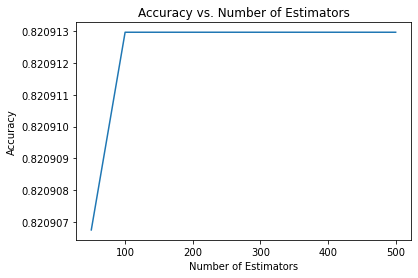

In [71]:
print("Optimum Accuracy: ", np.array(rf_accuracies)[np.argmax(rf_accuracies)])
print("Optimum Number of estimators: ", np.array(n_estimators)[np.argmax(rf_accuracies)])
plt.plot(n_estimators, rf_accuracies)
plt.title("Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.ticklabel_format(useOffset=False)

Accuracy:  0.8209129683283801
Precision:  0.754262891085053
Recall:  0.9998868650299808
F1-Score:  0.8598781887879201
AUC:  0.8012215906421989
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     72448
           1       0.75      1.00      0.86     88390

    accuracy                           0.82    160838
   macro avg       0.88      0.80      0.81    160838
weighted avg       0.86      0.82      0.81    160838



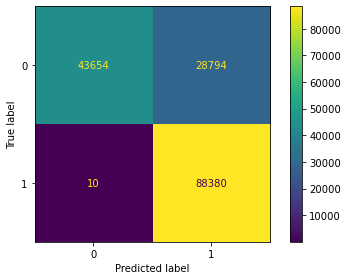

In [55]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.tight_layout()
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

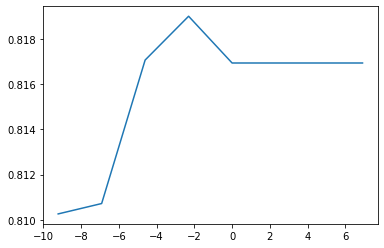

In [58]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lr_accuracies = []

for c in C:
    lr = LogisticRegression(C=c, max_iter=500, solver='saga', class_weight='balanced', random_state=0)
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    lr_accuracies.append(test_accuracy)
    
plt.plot(np.log(C), lr_accuracies)

Accuracy:  0.8190104328579068
Precision:  0.7538845013961935
Recall:  0.9957348116302749
F1-Score:  0.858094142422588
AUC:  0.7995665555501198
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     72448
           1       0.75      1.00      0.86     88390

    accuracy                           0.82    160838
   macro avg       0.87      0.80      0.80    160838
weighted avg       0.86      0.82      0.81    160838



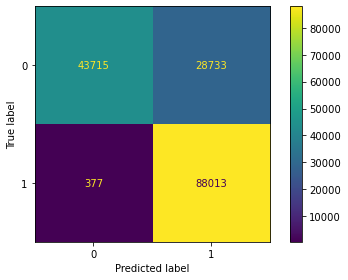

In [59]:
c = np.array(C)[np.argmax(lr_accuracies)]
lr = LogisticRegression(C=c, max_iter=500, solver='saga', class_weight='balanced', random_state=0)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.tight_layout()
plt.show()

Accuracy:  0.8102500652830799
Precision:  0.7541612866390858
Recall:  0.9713655390881322
F1-Score:  0.8490928959587019
AUC:  0.7925235380953028
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     72448
           1       0.75      0.97      0.85     88390

    accuracy                           0.81    160838
   macro avg       0.85      0.79      0.80    160838
weighted avg       0.84      0.81      0.80    160838



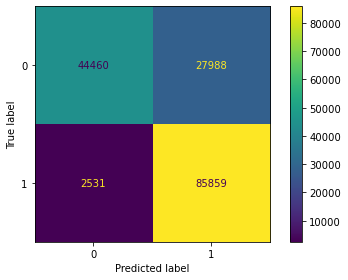

In [60]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.tight_layout()
plt.show()